In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser

In [2]:
#### Import File
df = pd.read_csv('bread basket.csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
#### Pengecekan Type Data
df.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

In [4]:
#### Pengecekan Missing Value
df.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [5]:
#### Describe Data
df.describe(include='all')

,Transaction,Item,date_time,period_day,weekday_weekend
count,20507.000000,20507,20507,20507,20507
unique,NaN,94,9182,4,2
top,NaN,Coffee,05-02-2017 11:58,afternoon,weekday
freq,NaN,5471,12,11569,12807
mean,4976.202370,NaN,NaN,NaN,NaN
std,2796.203001,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,2552.000000,NaN,NaN,NaN,NaN
50%,5137.000000,NaN,NaN,NaN,NaN
75%,7357.000000,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [7]:
df['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [8]:
df['Item'].nunique()

94

In [9]:
df['period_day'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

In [10]:
df['weekday_weekend'].unique()

array(['weekend', 'weekday'], dtype=object)

In [11]:
#### Pengecekan Outliers

In [12]:
#### Merubah Tipe Data Tanggal
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

In [13]:
df.dtypes

Transaction                 int64
Item                       object
date_time          datetime64[ns]
period_day                 object
weekday_weekend            object
dtype: object

In [14]:
df['date_time']

0       2016-10-30 09:58:00
1       2016-10-30 10:05:00
2       2016-10-30 10:05:00
3       2016-10-30 10:07:00
4       2016-10-30 10:07:00
                ...        
20502   2017-04-09 14:32:00
20503   2017-04-09 14:32:00
20504   2017-04-09 14:57:00
20505   2017-04-09 14:57:00
20506   2017-04-09 15:04:00
Name: date_time, Length: 20507, dtype: datetime64[ns]

In [15]:
purchase_dt = df['date_time'].dt

In [16]:
df['month'] = purchase_dt.month
df['year'] = purchase_dt.year
df['day'] = purchase_dt.day
df['nameday'] = purchase_dt.day_name()
df['hour'] = purchase_dt.hour
df['quarter'] = purchase_dt.to_period('Q')
df['yearmonth'] = purchase_dt.to_period('M')
df['yearmonth'] = df['yearmonth'].astype(str)

In [17]:
hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['nameday'] = pd.Categorical(df['nameday'], categories=hari, ordered=True)

In [18]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10


In [19]:
df.tail()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,4,2017,9,Sunday,14,2017Q2,2017-04
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,4,2017,9,Sunday,14,2017Q2,2017-04
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,4,2017,9,Sunday,14,2017Q2,2017-04
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,4,2017,9,Sunday,14,2017Q2,2017-04
20506,9684,Smoothies,2017-04-09 15:04:00,afternoon,weekend,4,2017,9,Sunday,15,2017Q2,2017-04


In [20]:
##### Mengkategorikan Item
## List Kategori Item
other = ["Jam" , "Afternoon with the baker" , "Art Tray" , "Extra Salami or Feta" , "Eggs", "Granola","Tshirt","My-5 Fruit Shoot","Ella's Kitchen Pouches",
         "Crisps", "Dulce de Leche","Valentine's card","Duck egg","Pick and Mix Bowls","Christmas common","Mighty Protein","Chocolates",
         "Postcard","Gingerbread syrup","Drinking chocolate spoons","Muesli","Nomad bag","Argentina Night","Coffee granules","Victorian Sponge","Basket",
         "Half slice Monster" , "Honey" , "Bare Popcorn", "Mortimer", "Cherry me Dried fruit", "Bowl Nic Pitt" , "Chimichurri Oil","Fairy Doors",
         "Hack the stack", "Siblings", "Spread","Adjustment","Gift voucher","Polenta","The BART", "Lemon and coconut"]

food_bakery = ["Bread","Cake", "Pastry","Sandwich","Medialuna","Cookies","Brownie","Muffin","Alfajores","Scone","Toast","Scandinavian","Fudge","Baguette","Tiffin",
               "Jammie Dodgers","The Nomad","Focaccia","Vegan mincepie","Bakewell","Tartine","Panatone","Bread Pudding","Raspberry shortbread sandwich","Plum & polenta",
               "Raw bars","Crepes","Kids biscuit","Caramel bites", "Truffles", "Empanadas"]

food_main_dishes = ["Farm House","Soup","Spanish Brunch","Chicken Stew","Hearty & Seasonal","Salad","Frittata","Keeping It Local","Vegan Feast","Pintxos",
                    "Brioche and salami","Bacon","Chicken sand", "Tacos/Fajita"]

all_food = ["Bread","Cake", "Pastry","Sandwich","Medialuna","Cookies","Brownie","Muffin","Alfajores","Scone","Toast","Scandinavian","Fudge","Baguette","Tiffin",
            "Jammie Dodgers","The Nomad","Focaccia","Vegan mincepie","Bakewell","Tartine","Panatone","Bread Pudding","Raspberry shortbread sandwich","Plum & polenta",
            "Raw bars","Crepes","Kids biscuit","Caramel bites", "Truffles", "Empanadas","Farm House","Soup","Spanish Brunch","Chicken Stew","Hearty & Seasonal","Salad","Frittata","Keeping It Local","Vegan Feast","Pintxos",
                    "Brioche and salami","Bacon","Chicken sand", "Tacos/Fajita"]

beverages = ["Coffee" , "Tea", "Hot chocolate","Juice", "Coke", "Mineral water","Smoothies"]


In [21]:
kategori_raw = []
for i in df['Item']:
    if i in all_food:
        kategori_raw.append('Food')
    elif i in beverages :
        kategori_raw.append('Beverages')
    else:
        kategori_raw.append('Others')

df['item_category'] = kategori_raw

In [22]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others


In [23]:
bakery_raw = []
for i in df['Item']:
    if i in food_bakery:
        bakery_raw.append('Bakery')
    else:
        bakery_raw.append('Non Bakery')

df['bakery_category'] = bakery_raw

In [24]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


#### Sales Breakdown By Year & Category

In [25]:
## Total Sales By Year
df_yearsales_total = df[['Item', 'year']].groupby(['year']).count().reset_index()
df_yearsales_total.rename(columns = {'Item':'total_sales'}, inplace=True)
# df_yearsales_total

In [26]:
## Bakery Sales By YEar
df_yearsales_bakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Bakery')].pivot_table(index='year', values='period_day', aggfunc='count').reset_index()
df_yearsales_bakery.rename(columns = {'period_day':'bakery_sales'}, inplace=True)
# df_yearsales_bakery

In [27]:
## Merge
df_merge_totalbakery = pd.merge(df_yearsales_total, df_yearsales_bakery, on = ['year'])
# df_merge_totalbakery

In [28]:
### Sales Non Bakery Food By Year
df_yearsales_nonbakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Non Bakery')].pivot_table(index='year', values='period_day', aggfunc='count').reset_index()
df_yearsales_nonbakery.rename(columns = {'period_day':'non_bakery_sales'}, inplace=True)
# df_yearsales_nonbakery

In [29]:
df_merge_totalbakerynonbakery = pd.merge(df_merge_totalbakery, df_yearsales_nonbakery, on = ['year'])
# df_merge_totalbakerynonbakery

In [30]:
### Sales Beverages By Year
df_yearsales_beverages = df[(df['item_category'] == 'Beverages')].pivot_table(index='year', values='period_day', aggfunc='count').reset_index()
df_yearsales_beverages.rename(columns = {'period_day':'beverages_sales'}, inplace=True)
# df_yearsales_beverages

In [31]:
df_merge_totalbakerynonbakerybeverages = pd.merge(df_merge_totalbakerynonbakery, df_yearsales_beverages, on = ['year'])
# df_merge_totalbakerynonbakerybeverages

In [32]:
### Sales Others By Year
df_yearsales_others = df[(df['item_category'] == 'Others')].pivot_table(index='year', values='period_day', aggfunc='count').reset_index()
df_yearsales_others.rename(columns = {'period_day':'other_sales'}, inplace=True)
# df_yearsales_others

In [33]:
df_merge_yearlysalestotal = pd.merge(df_merge_totalbakerynonbakerybeverages, df_yearsales_others, on = ['year'])
df_merge_yearlysalestotal

,year,total_sales,bakery_sales,non_bakery_sales,beverages_sales,other_sales
0,2016,8144,4047,520,3314,263
1,2017,12363,6203,879,4949,332


In [34]:
bakery_percentage = (6203 + 4047)/ (8144+12363)*100
bakery_percentage

49.98293265714147

In [35]:
beverages_percentage = (3314 + 4949)/ (8144+12363)*100
beverages_percentage

40.29355829716682

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


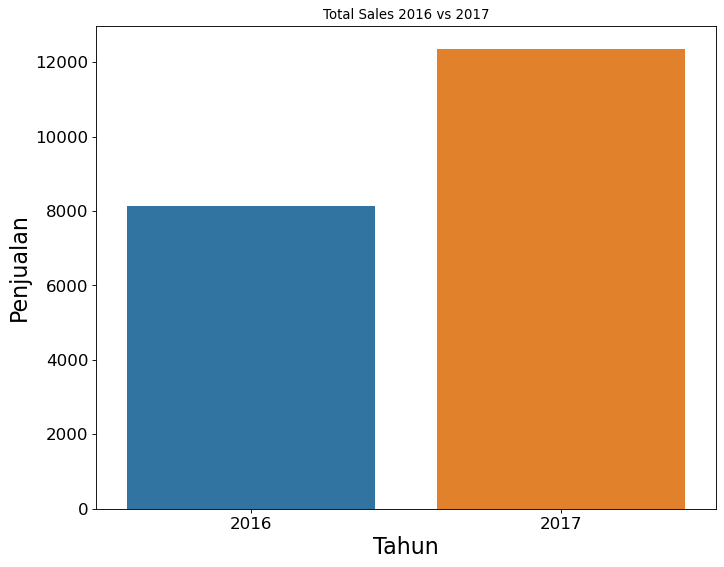

In [36]:
plt.figure(figsize=(10,8), dpi=80)
sns.countplot(df['year'])
plt.title('Total Sales 2016 vs 2017')
plt.xlabel("Tahun",size = 20)
plt.ylabel("Penjualan", size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

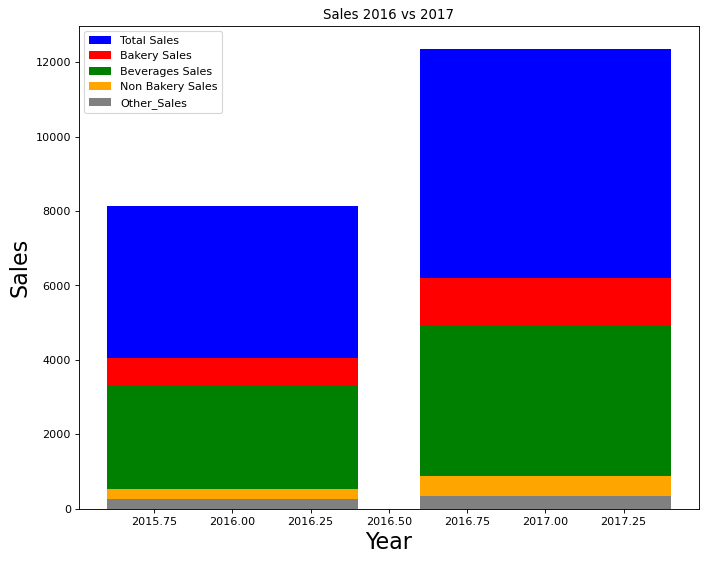

In [165]:
plt.figure(figsize=(10,8), dpi = 80)
plt.bar(df_merge_yearlysalestotal['year'], df_merge_yearlysalestotal['total_sales'], 
       color='blue')

plt.bar(df_merge_yearlysalestotal['year'], df_merge_yearlysalestotal['bakery_sales'], 
       color='red')

plt.bar(df_merge_yearlysalestotal['year'], df_merge_yearlysalestotal['beverages_sales'], 
       color='green')

plt.bar(df_merge_yearlysalestotal['year'], df_merge_yearlysalestotal['non_bakery_sales'], 
       color='orange')

plt.bar(df_merge_yearlysalestotal['year'], df_merge_yearlysalestotal['other_sales'], 
       color='gray')

plt.title('Sales 2016 vs 2017')
plt.xlabel("Year",size = 20)
plt.ylabel("Sales", size = 20)
plt.legend(["Total Sales", "Bakery Sales", "Beverages Sales", "Non Bakery Sales", "Other_Sales"], loc=0)
plt.show()

#### Sales Top & Bottom Item

In [38]:
#### Analisa Univariate Kolom Item

In [39]:
#### Top Item All Sales
df_top_item = df.pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending=False).head(10).reset_index()
df_top_item

,Item,period_day
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


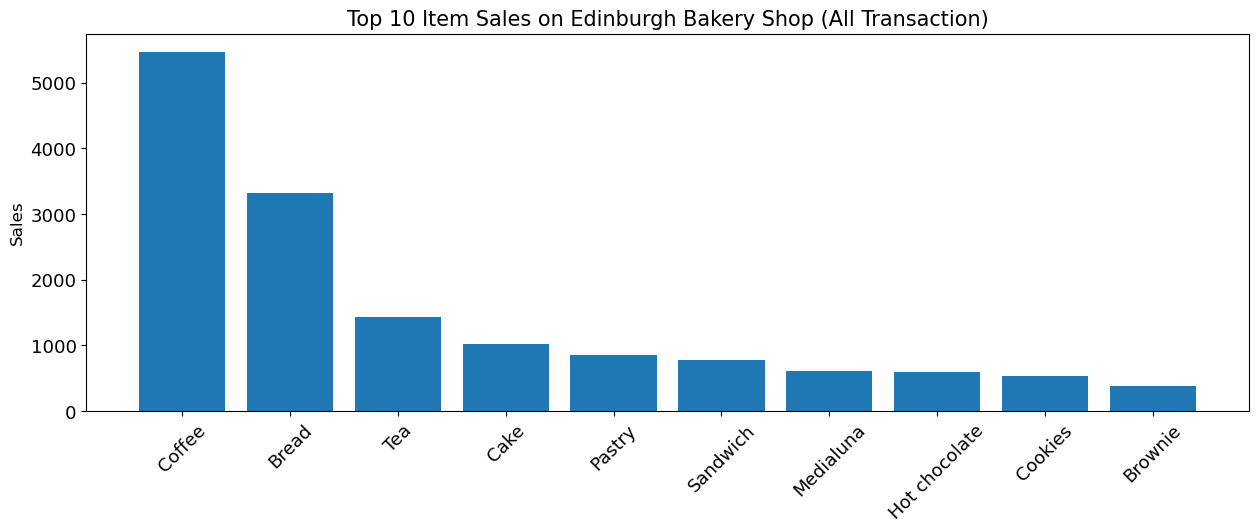

In [40]:
plt.figure(figsize=(15,5),dpi=100)
plt.bar(x=df_top_item['Item'], height=df_top_item['period_day'])
plt.title("Top 10 Item Sales on Edinburgh Bakery Shop (All Transaction)",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.yticks(fontsize=13)
plt.xticks(rotation=45,size=13)
plt.show()

In [41]:
#### Bottom Item All Sales
df_bottom_item = df.pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending=False).tail(10).reset_index()
df_bottom_item

,Item,period_day
0,Bowl Nic Pitt,2
1,Hack the stack,2
2,Bacon,1
3,Polenta,1
4,The BART,1
5,Chicken sand,1
6,Gift voucher,1
7,Olum & polenta,1
8,Raw bars,1
9,Adjustment,1


In [42]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


In [43]:
df[['Item', 'item_category']].groupby(['item_category']).count().reset_index()

,item_category,Item
0,Beverages,8263
1,Food,11649
2,Others,595


#### Sales Breakdown By Food Bakery, Food Non_Bakery, and Beverages (Top & Bottom)

In [44]:
### Breakdown By Food, Beverage, Bakery, Non_Bakery

In [104]:
#### SALES CATEGORY BY BEVERAGE
df_beverage = df[df['item_category'] == 'Beverages'].pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending = False).reset_index()
df_beverage.to_excel('beverages.xlsx', index=False)
df_beverage

,Item,period_day
0,Coffee,5471
1,Tea,1435
2,Hot chocolate,590
3,Juice,369
4,Coke,185
5,Mineral water,136
6,Smoothies,77


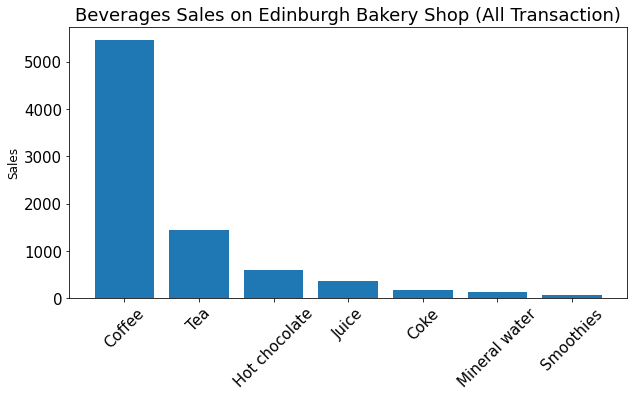

In [46]:
plt.figure(figsize=(10,5))
plt.bar(x=df_beverage['Item'], height=df_beverage['period_day'])
plt.title("Beverages Sales on Edinburgh Bakery Shop (All Transaction)",size = 18)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,size=15)
plt.show()

In [47]:
### Sales Category By FOOD (Bakery & Non_Bakery)
df_food = df[df['item_category'] == 'Food'].pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending = False).reset_index()
df_food

,Item,period_day
0,Bread,3325
1,Cake,1025
2,Pastry,856
3,Sandwich,771
4,Medialuna,616
5,Cookies,540
6,Brownie,379
7,Farm House,374
8,Muffin,370
9,Alfajores,369


In [48]:
df_food5=df_food.head(10)

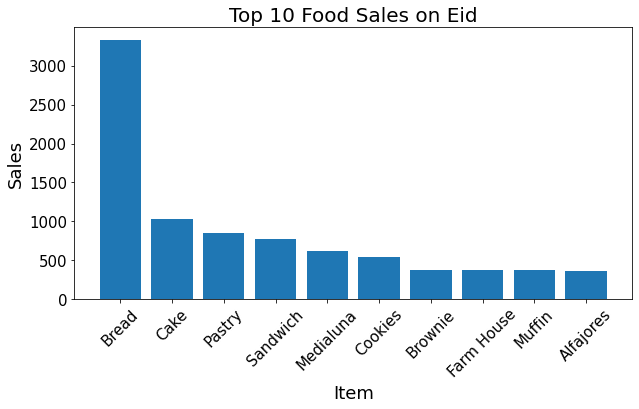

In [49]:
plt.figure(figsize=(10,5))
plt.bar(x=df_food5['Item'], height=df_food5['period_day'])
plt.title("Top 10 Food Sales on Eid",size=20)
plt.xlabel('Item', size=18)
plt.ylabel("Sales",size=18)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,size=15)
plt.show()

In [50]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


In [103]:
#### By Bakery Category
df_bakery= df[df['bakery_category'] == 'Bakery'].pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending = False).reset_index()
df_bakery
df_bakery.to_excel('bakery.xlsx', index=False)

In [52]:
df_bakery_top5=df_bakery.head(10)

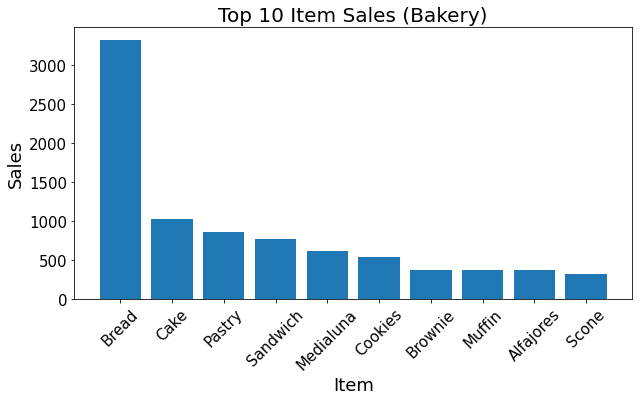

In [53]:
plt.figure(figsize=(10,5))
plt.bar(x=df_bakery_top5['Item'], height=df_bakery_top5['period_day'])
plt.title("Top 10 Item Sales (Bakery)",size = 20)
plt.xlabel('Item', size=18)
plt.ylabel("Sales",size=18)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,size=15)
plt.show()

In [54]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


In [105]:
df_non_bakery= df[(df['bakery_category'] == 'Non Bakery') & (df['item_category']=='Food')].pivot_table(index='Item', values='period_day', aggfunc='count').sort_values('period_day', ascending = False).reset_index()
df_non_bakery.to_excel('non_bakery.xlsx', index=False)
df_non_bakery

,Item,period_day
0,Farm House,374
1,Soup,342
2,Spanish Brunch,172
3,Chicken Stew,123
4,Hearty & Seasonal,107
5,Salad,99
6,Frittata,81
7,Keeping It Local,63
8,Vegan Feast,16
9,Tacos/Fajita,11


### Breakdown By Month

In [56]:
### ALl Item Sales By Month
df_monthly_salestotal = df.pivot_table(index='yearmonth', values='period_day', aggfunc='count').reset_index()
df_monthly_salestotal.rename(columns = {'period_day':'total_sales'}, inplace=True)
df_monthly_salestotal

,yearmonth,total_sales
0,2016-10,369
1,2016-11,4436
2,2016-12,3339
3,2017-01,3356
4,2017-02,3906
5,2017-03,3944
6,2017-04,1157


In [57]:
# plt.figure(figsize=(15,8),dpi=100)
# plt.plot(df_monthly_salestotal['yearmonth'], df_monthly_salestotal['total_sales'], color='r', marker='v', markerfacecolor='g', markersize=10, linestyle=':', linewidth=3)
# plt.title("Sales Breakdown By Month",size = 20)
# plt.xlabel('Period', size=18)
# plt.ylabel("Sales",size=18)
# plt.yticks(fontsize=15)
# plt.xticks(rotation=45,size=15)
# plt.show()

In [58]:
## Monthly Sales Food Bakery
df_monthly_salesfoodbakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Bakery')].pivot_table(index='yearmonth', values='period_day', aggfunc='count').reset_index()
df_monthly_salesfoodbakery.rename(columns = {'period_day':'bakery_sales'}, inplace=True)
# df_monthly_salesfoodbakery

In [59]:
df_merge_monthlytotalbakery = pd.merge(df_monthly_salestotal, df_monthly_salesfoodbakery, on = ['yearmonth'])
# df_merge_monthlytotalbakery

In [60]:
df_monthly_salesfoodnonbakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Non Bakery')].pivot_table(index='yearmonth', values='period_day', aggfunc='count').reset_index()
df_monthly_salesfoodnonbakery.rename(columns = {'period_day':'non_bakery_sales'}, inplace=True)
# df_monthly_salesfoodnonbakery

In [61]:
df_merge_monthlytotalbakerynonbakery = pd.merge(df_merge_monthlytotalbakery, df_monthly_salesfoodnonbakery, on = ['yearmonth'])
# df_merge_monthlytotalbakerynonbakery

In [62]:
df_monthly_salesbeverages = df[(df['item_category'] == 'Beverages')].pivot_table(index='yearmonth', values='period_day', aggfunc='count').reset_index()
df_monthly_salesbeverages.rename(columns = {'period_day':'beverages_sales'}, inplace=True)
# df_monthly_salesbeverages

In [63]:
df_merge_monthlysales = pd.merge(df_merge_monthlytotalbakerynonbakery, df_monthly_salesbeverages, on = ['yearmonth'])
df_merge_monthlysales

,yearmonth,total_sales,bakery_sales,non_bakery_sales,beverages_sales
0,2016-10,369,163,38,148
1,2016-11,4436,2179,361,1743
2,2016-12,3339,1705,121,1423
3,2017-01,3356,1722,211,1362
4,2017-02,3906,1984,269,1524
5,2017-03,3944,1929,304,1613
6,2017-04,1157,568,95,450


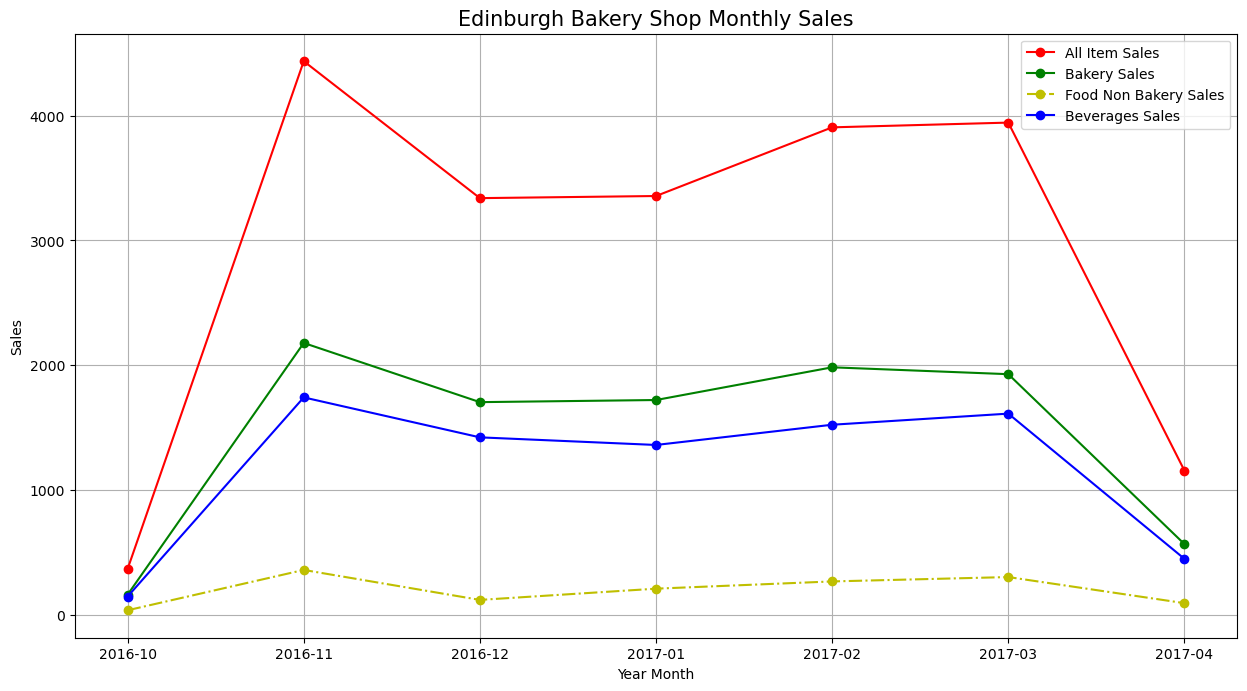

In [64]:
plt.figure(figsize=(15,8),dpi=100)
plt.plot(
    df_merge_monthlysales['yearmonth'], df_merge_monthlysales['total_sales'], 'ro-', 
    df_merge_monthlysales['yearmonth'], df_merge_monthlysales['bakery_sales'], 'go-',
    df_merge_monthlysales['yearmonth'], df_merge_monthlysales['non_bakery_sales'], 'yo-.',
    df_merge_monthlysales['yearmonth'], df_merge_monthlysales['beverages_sales'], 'bo-',

)
        
plt.title("Edinburgh Bakery Shop Monthly Sales", size=15)
plt.xlabel("Year Month")
plt.ylabel("Sales")
plt.grid(True)
plt.legend(["All Item Sales", "Bakery Sales", "Food Non Bakery Sales", "Beverages Sales"], loc=0)
plt.savefig('MonthlySales.png')

plt.show()

In [67]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


### Sales By Top Month (November 2016)

In [133]:
df_november_sales_byitemcategory = df[df['yearmonth']=='2016-11'].pivot_table(index='item_category', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False).head(10)
df_november_sales_byitemcategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_november_sales_byitemcategory.to_excel('november_sales_byitemcategory.xlsx', index=False)
df_november_sales_byitemcategory

,item_category,Sales
1,Food,2540
0,Beverages,1743
2,Others,153


In [70]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


In [132]:
df_november_sales_bakery = df[(df['bakery_category'] == 'Bakery') & (df['yearmonth'] == '2016-11')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_november_sales_bakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_november_sales_bakery.to_excel('november_sales_bakery.xlsx', index=False)
df_november_sales_bakery

,Item,Sales
2,Bread,712
15,Pastry,218
13,Medialuna,208
4,Brownie,154
0,Alfajores,141
14,Muffin,127
5,Cake,116
17,Scandinavian,105
16,Sandwich,103
7,Cookies,87


In [135]:
df_november_sales_nonbakery = df[(df['yearmonth']=='2016-11') & (df['item_category']=='Food') & (df['bakery_category']=='Non Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_november_sales_nonbakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_november_sales_nonbakery.to_excel('november_sales_nonbakery.xlsx', index=False)
df_november_sales_nonbakery

,Item,Sales
1,Farm House,113
5,Soup,98
3,Hearty & Seasonal,71
4,Keeping It Local,61
2,Frittata,17
0,Bacon,1


In [136]:
df_november_sales_beverage = df[(df['item_category'] == 'Beverages') & (df['yearmonth'] == '2016-11')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_november_sales_beverage.rename(columns = {'period_day':'Sales'}, inplace=True)
df_november_sales_beverage.to_excel('november_sales_beverage.xlsx', index=False)
df_november_sales_beverage

,Item,Sales
0,Coffee,1189
6,Tea,311
2,Hot chocolate,118
3,Juice,46
4,Mineral water,40
1,Coke,27
5,Smoothies,12


### Sales By Lowest Month (December 2016)

In [137]:
df_december_sales_byitemcategory = df[df['yearmonth']=='2016-12'].pivot_table(index='item_category', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False).head(10)
df_december_sales_byitemcategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_december_sales_byitemcategory.to_excel('december_sales_byitemcategory.xlsx', index=False)
df_december_sales_byitemcategory

,item_category,Sales
1,Food,1826
0,Beverages,1423
2,Others,90


In [138]:
df_december_sales_bakery = df[(df['bakery_category'] == 'Bakery') & (df['yearmonth'] == '2016-12')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_december_sales_bakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_december_sales_bakery.to_excel('december_sales_bakery.xlsx', index=False)
df_december_sales_bakery

,Item,Sales
2,Bread,625
10,Medialuna,141
4,Cake,141
14,Sandwich,129
13,Pastry,129
16,Scone,69
5,Cookies,68
19,Toast,65
8,Fudge,60
0,Alfajores,45


In [139]:
df_december_sales_nonbakery = df[(df['yearmonth']=='2016-12') & (df['item_category']=='Food') & (df['bakery_category'] == 'Non Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_december_sales_nonbakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_december_sales_nonbakery.to_excel('december_sales_nonbakery.xlsx', index=False)
df_december_sales_nonbakery

,Item,Sales
1,Farm House,76
2,Frittata,26
3,Hearty & Seasonal,10
5,Pintxos,6
4,Keeping It Local,2
0,Brioche and salami,1


In [140]:
df_december_sales_beverages = df[(df['item_category'] == 'Beverages') & (df['yearmonth'] == '2016-12')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_december_sales_beverages.rename(columns = {'period_day':'Sales'}, inplace=True)
df_december_sales_beverages.to_excel('december_sales_beverages.xlsx', index=False)
df_december_sales_beverages

,Item,Sales
0,Coffee,932
6,Tea,235
2,Hot chocolate,138
3,Juice,55
1,Coke,34
4,Mineral water,20
5,Smoothies,9


### Sales By Weekend Weekday

In [142]:
df_weekendweekday_sales = df.pivot_table(index='weekday_weekend', values='period_day', aggfunc='count').reset_index()
df_weekendweekday_sales.rename(columns = {'period_day':'total_sales'}, inplace=True)
df_weekendweekday_sales

,weekday_weekend,total_sales
0,weekday,12807
1,weekend,7700


In [149]:
# plt.figure(figsize=(10,8),dpi=100)
# plt.bar(x=df_weekendweekday_sales['weekday_weekend'], height=df_weekendweekday_sales['period_day'])
# plt.title("Sales Breakdown By Weekday Weekend",size=20)
# plt.xlabel('Name Day',size=18)
# plt.ylabel("Sales",size=18)
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [80]:
averages_weekdays_sales = df_weekendweekday_sales_mean.loc['weekday']['period_day']/5
averages_weekdays_sales

2561.4

In [81]:
averages_weekend_sales = df_weekendweekday_sales_mean.loc['weekend']['period_day']/2
averages_weekend_sales

3850.0

In [162]:
### Sales Weekendweekday By Bakery
df_weekendweekday_salesbakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Bakery')].pivot_table(index='weekday_weekend', values='period_day', aggfunc='count').reset_index()
df_weekendweekday_salesbakery.rename(columns = {'period_day':'bakery_sales'}, inplace=True)
# df_weekendweekday_salesbakery

In [160]:
df_mergeweekdays_totalbakery = pd.merge(df_weekendweekday_sales, df_weekendweekday_salesbakery, on = ['weekday_weekend'])
# df_mergeweekdays_totalbakery

In [152]:
df_weekendweekday_salesnonbakery = df[(df['item_category'] == 'Food') & (df['bakery_category'] == 'Non Bakery')].pivot_table(index='weekday_weekend', values='period_day', aggfunc='count').reset_index()
df_weekendweekday_salesnonbakery.rename(columns = {'period_day':'non_bakery_sales'}, inplace=True)
# df_weekendweekday_nonsalesbakery

In [161]:
df_mergeweekdays_totalbakerynonbakery = pd.merge(df_mergeweekdays_totalbakery, df_weekendweekday_salesnonbakery, on = ['weekday_weekend'])
# df_mergeweekdays_totalbakerynonbakery

In [157]:
df_weekendweekday_salesbeverages = df[(df['item_category'] == 'Beverages')].pivot_table(index='weekday_weekend', values='period_day', aggfunc='count').reset_index()
df_weekendweekday_salesbeverages.rename(columns = {'period_day':'beverages_sales'}, inplace=True)
# df_weekendweekday_salesbeverages

In [159]:
df_mergeweekdays_total = pd.merge(df_mergeweekdays_totalbakerynonbakery, df_weekendweekday_salesbeverages, on = ['weekday_weekend'])
df_mergeweekdays_total

,weekday_weekend,total_sales,bakery_sales,non_bakery_sales,beverages_sales
0,weekday,12807,6273,889,5334
1,weekend,7700,3977,510,2929


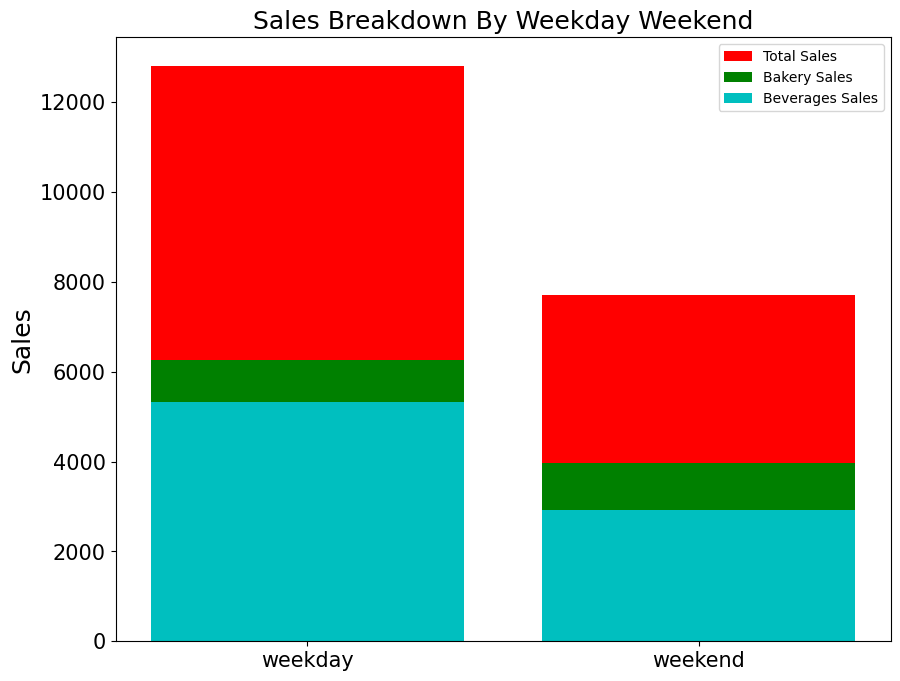

In [178]:
# color = ['r', 'g', 'b', 'c', 'm']
plt.figure(figsize=(10,8),dpi=100)
plt.bar(x=df_mergeweekdays_total['weekday_weekend'], height=df_mergeweekdays_total['total_sales'], color = 'r')
plt.bar(x=df_mergeweekdays_total['weekday_weekend'], height=df_mergeweekdays_total['bakery_sales'], color = 'g')
plt.bar(x=df_mergeweekdays_total['weekday_weekend'], height=df_mergeweekdays_total['beverages_sales'], color = 'c')
plt.title("Sales Breakdown By Weekday Weekend",size=18)
# plt.xlabel('Name Day',size=18)
plt.ylabel("Sales",size=18)
plt.legend(["Total Sales", "Bakery Sales", "Beverages Sales"], loc=0)
plt.savefig('WeeklySales.png')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [82]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


### Sales By Day

In [192]:
df_day_sales = df.pivot_table(index='nameday', values='period_day', aggfunc='count').reset_index().sort_values('nameday')
df_day_sales.rename(columns = {'period_day':'total_sales'}, inplace=True)
# df_day_sales

In [191]:
df_day_bakerysales = df[df['bakery_category']== 'Bakery'].pivot_table(index='nameday', values='period_day', aggfunc='count').reset_index().sort_values('nameday')
df_day_bakerysales.rename(columns = {'period_day':'bakery_sales'}, inplace=True)
# df_day_bakerysales

In [190]:
df_mergeweekdays_totalbakery = pd.merge(df_day_sales, df_day_bakerysales, on = ['nameday'])
# df_mergeweekdays_totalbakery

In [189]:
df_day_beveragessales = df[df['item_category']== 'Beverages'].pivot_table(index='nameday', values='period_day', aggfunc='count').reset_index().sort_values('nameday')
df_day_beveragessales.rename(columns = {'period_day':'beverages_sales'}, inplace=True)
# df_day_beveragessales

In [194]:
df_mergeweekdaystotal_total = pd.merge(df_mergeweekdays_totalbakery, df_day_beveragessales, on = ['nameday'])
df_mergeweekdaystotal_total

,nameday,total_sales,bakery_sales,beverages_sales
0,Monday,2324,1117,1003
1,Tuesday,2392,1117,1038
2,Wednesday,2321,1115,989
3,Thursday,2646,1325,1057
4,Friday,3124,1599,1247
5,Saturday,4605,2409,1713
6,Sunday,3095,1568,1216


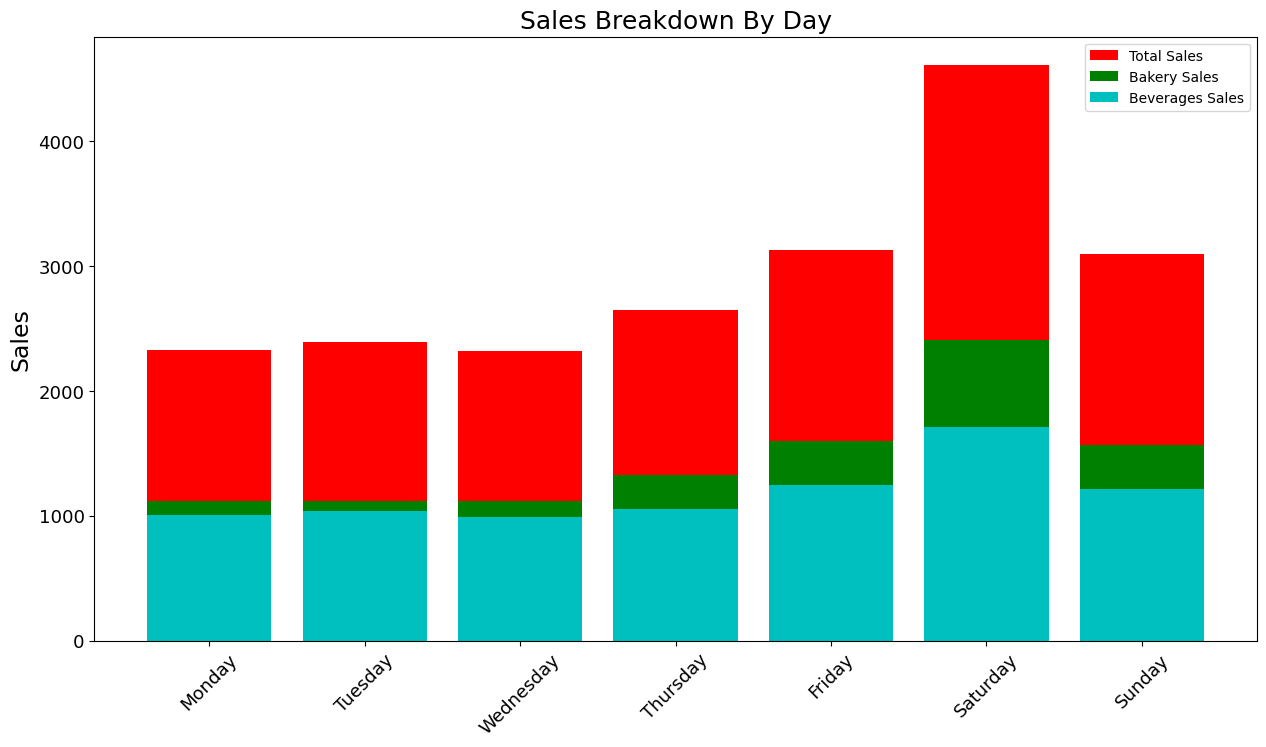

In [198]:
plt.figure(figsize=(15,8),dpi=100)
plt.bar(x=df_mergeweekdaystotal_total['nameday'], height=df_mergeweekdaystotal_total['total_sales'], color='r')
plt.bar(x=df_mergeweekdaystotal_total['nameday'], height=df_mergeweekdaystotal_total['bakery_sales'], color='g')
plt.bar(x=df_mergeweekdaystotal_total['nameday'], height=df_mergeweekdaystotal_total['beverages_sales'], color='c')
plt.title("Sales Breakdown By Day",size=18)
# plt.xlabel('Name Day',size=17)
plt.ylabel("Sales",size=17)
plt.legend(["Total Sales", "Bakery Sales", "Beverages Sales"], loc=0)
plt.xticks(rotation=45,size=13)
plt.yticks(size=13)
plt.savefig('DailySales.png')
plt.show()

# # color = ['r', 'g', 'b', 'c', 'm']
# plt.figure(figsize=(10,8),dpi=100)
# plt.bar(x=df_mergeweekdays_total['weekday_weekend'], height=df_mergeweekdays_total['total_sales'], color = 'r')
# plt.bar(x=df_mergeweekdays_total['weekday_weekend'], height=df_mergeweekdays_total['bakery_sales'], color = 'g')
# plt.bar(x=df_mergeweekdays_total['weekday_weekend'], height=df_mergeweekdays_total['beverages_sales'], color = 'c')
# plt.title("Sales Breakdown By Weekday Weekend",size=18)
# # plt.xlabel('Name Day',size=18)
# plt.ylabel("Sales",size=18)
# plt.legend(["Total Sales", "Bakery Sales", "Beverages Sales"], loc=0)
# plt.savefig('WeeklySales.png')
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [85]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


## Sales Saturday

In [201]:
df_saturday_sales_byitemcategory = df[df['nameday']=='Saturday'].pivot_table(index='item_category', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_byitemcategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_byitemcategory.to_excel('saturday_sales_byitemcategory.xlsx', index=False)
df_saturday_sales_byitemcategory

,item_category,Sales
1,Food,2714
0,Beverages,1713
2,Others,178


In [203]:
df_saturday_sales_byfoodbakerycategory = df[(df['bakery_category'] == 'Bakery') & (df['nameday'] == 'Saturday')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_byfoodbakerycategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_byfoodbakerycategory.to_excel('saturday_sales_byitembakerycategory.xlsx', index=False)
df_saturday_sales_byfoodbakerycategory

,Item,Sales
3,Bread,760
5,Cake,246
15,Pastry,166
17,Sandwich,161
19,Scone,146
12,Medialuna,143
18,Scandinavian,118
4,Brownie,111
13,Muffin,93
7,Cookies,79


In [205]:
df_saturday_sales_nonbakery = df[(df['nameday'] == 'Saturday') & (df['item_category']=='Food') & (df['bakery_category']=='Non Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_nonbakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_nonbakery.to_excel('saturday_sales_nonbakery.xlsx', index=False)
df_saturday_sales_nonbakery

,Item,Sales
1,Farm House,76
7,Soup,50
8,Spanish Brunch,47
2,Frittata,39
0,Chicken Stew,22
6,Salad,22
3,Hearty & Seasonal,18
10,Vegan Feast,10
9,Tacos/Fajita,8
4,Keeping It Local,7


In [204]:
df_saturday_sales_bybeveragecategory = df[(df['item_category'] == 'Beverages') & (df['nameday'] == 'Saturday')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_bybeveragecategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_bybeveragecategory.to_excel('saturday_sales_bybeverages.xlsx', index=False)
df_saturday_sales_bybeveragecategory

,Item,Sales
0,Coffee,1103
6,Tea,288
2,Hot chocolate,146
3,Juice,85
1,Coke,45
4,Mineral water,27
5,Smoothies,19


## Sales Wednesday

In [206]:
df_wednesday_sales_byitemcategory = df[df['nameday']=='Wednesday'].pivot_table(index='item_category', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_wednesday_sales_byitemcategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_wednesday_sales_byitemcategory.to_excel('wednesday_sales_byitemcategory.xlsx', index=False)
df_wednesday_sales_byitemcategory

,item_category,Sales
1,Food,1268
0,Beverages,989
2,Others,64


In [207]:
df_wednesday_sales_byfoodcategorybakery = df[(df['nameday']=='Wednesday') & (df['bakery_category']=='Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_wednesday_sales_byfoodcategorybakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_wednesday_sales_byfoodcategorybakery.to_excel('wednesday_sales_byfoodcategorybakery.xlsx', index=False)
df_wednesday_sales_byfoodcategorybakery

,Item,Sales
3,Bread,405
6,Cake,123
14,Pastry,103
16,Sandwich,92
7,Cookies,63
12,Medialuna,56
0,Alfajores,41
22,Toast,35
5,Brownie,30
13,Muffin,29


In [208]:
df_wednesday_sales_nonbakery = df[(df['nameday'] == 'Wednesday') & (df['item_category']=='Food') & (df['bakery_category']=='Non Bakery')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_wednesday_sales_nonbakery.rename(columns = {'period_day':'Sales'}, inplace=True)
df_wednesday_sales_nonbakery.to_excel('wednesday_sales_nonbakery.xlsx', index=False)
df_wednesday_sales_nonbakery

,Item,Sales
5,Soup,56
1,Farm House,40
0,Chicken Stew,14
2,Hearty & Seasonal,12
4,Salad,11
6,Spanish Brunch,10
3,Keeping It Local,9
7,Vegan Feast,1


In [209]:
df_wednesday_sales_bybeveragecategory = df[(df['item_category'] == 'Beverages') & (df['nameday'] == 'Wednesday')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_wednesday_sales_bybeveragecategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_wednesday_sales_bybeveragecategory.to_excel('wednesday_sales_beverages.xlsx', index=False)
df_wednesday_sales_bybeveragecategory

,Item,Sales
0,Coffee,628
6,Tea,188
2,Hot chocolate,69
3,Juice,44
1,Coke,34
4,Mineral water,18
5,Smoothies,8


### Sales By Period Time

In [96]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


In [97]:
period = ['morning', 'afternoon', 'evening', 'night']
df['period_day'] = pd.Categorical(df['period_day'], categories=period, ordered=True)

In [218]:
df_periodtime_sales = df.pivot_table(index='period_day', values='weekday_weekend', aggfunc='count').reset_index()
df_periodtime_sales.rename(columns = {'weekday_weekend':'total_sales'}, inplace=True)
# df_periodtime_sales

In [219]:
df_periodtime_salesbakery = df[(df['bakery_category']=='Bakery')].pivot_table(index='period_day', values='weekday_weekend', aggfunc='count').reset_index()
df_periodtime_salesbakery.rename(columns = {'weekday_weekend':'bakery_sales'}, inplace=True)
# df_periodtime_salesbakery

In [220]:
df_mergeperiodtime_totalbakery = pd.merge(df_periodtime_sales, df_periodtime_salesbakery, on = ['period_day'])
# df_mergeperiodtime_totalbakery

In [221]:
df_periodtime_salesbeverages = df[(df['item_category']=='Beverages')].pivot_table(index='period_day', values='weekday_weekend', aggfunc='count').reset_index()
df_periodtime_salesbeverages.rename(columns = {'weekday_weekend':'beverages_sales'}, inplace=True)
# df_periodtime_salesbeverages

In [217]:
df_mergeperiodtime_totalbakerybeverages = pd.merge(df_mergeperiodtime_totalbakery, df_periodtime_salesbeverages, on = ['period_day'])
df_mergeperiodtime_totalbakerybeverages

,period_day,total_sales,bakery_sales,beverages_sales
0,morning,8404,4380,3454
1,afternoon,11569,5643,4619
2,evening,520,226,186
3,night,14,1,4


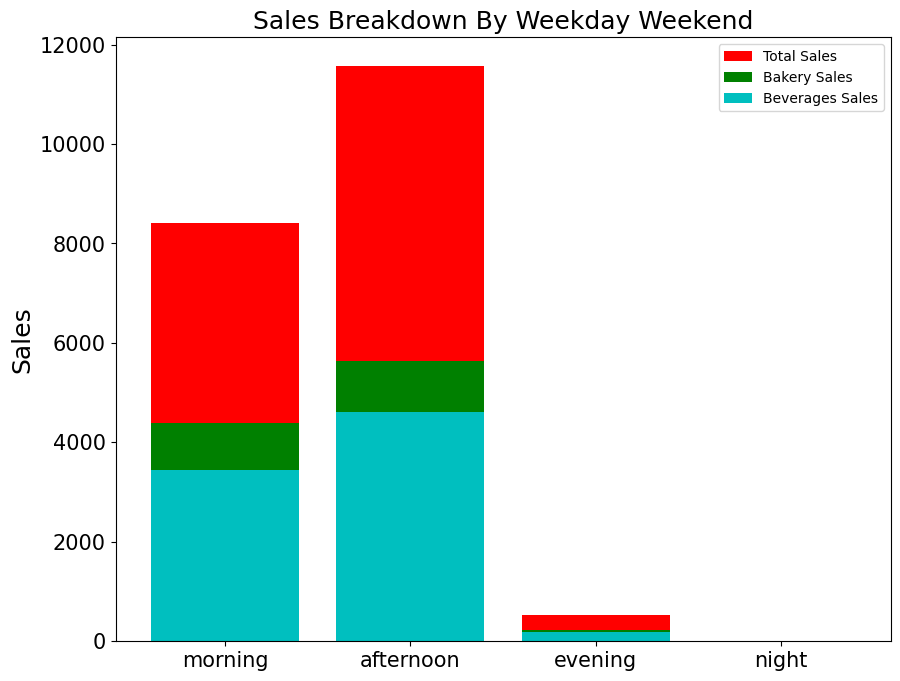

In [222]:
plt.figure(figsize=(10,8),dpi=100)
plt.bar(x=df_mergeperiodtime_totalbakerybeverages['period_day'], height=df_mergeperiodtime_totalbakerybeverages['total_sales'], color = 'r')
plt.bar(x=df_mergeperiodtime_totalbakerybeverages['period_day'], height=df_mergeperiodtime_totalbakerybeverages['bakery_sales'], color = 'g')
plt.bar(x=df_mergeperiodtime_totalbakerybeverages['period_day'], height=df_mergeperiodtime_totalbakerybeverages['beverages_sales'], color = 'c')
plt.title("Sales Breakdown By Weekday Weekend",size=18)
# plt.xlabel('Name Day',size=18)
plt.ylabel("Sales",size=18)
plt.legend(["Total Sales", "Bakery Sales", "Beverages Sales"], loc=0)
plt.savefig('PeriodTimeSales.png')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [223]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,year,day,nameday,hour,quarter,yearmonth,item_category,bakery_category
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016,30,Sunday,9,2016Q4,2016-10,Food,Bakery
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Food,Bakery
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Beverages,Non Bakery
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016,30,Sunday,10,2016Q4,2016-10,Others,Non Bakery


In [226]:
df_saturday_sales_bybeveragecategory = df[(df['item_category'] == 'Beverages') & (df['nameday'] == 'Saturday') & (df['yearmonth']=='2016-12')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_bybeveragecategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_bybeveragecategory.to_excel('saturday_sales__december_beverages.xlsx', index=False)
df_saturday_sales_bybeveragecategory

,Item,Sales
0,Coffee,175
6,Tea,58
2,Hot chocolate,37
3,Juice,16
1,Coke,10
4,Mineral water,4
5,Smoothies,1


In [228]:
df_saturday_sales_bybeveragecategory = df[(df['item_category'] == 'Beverages') & (df['nameday'] == 'Wednesday') & (df['yearmonth']=='2016-12')].pivot_table(index='Item', values='period_day', aggfunc='count').reset_index().sort_values('period_day', ascending=False)
df_saturday_sales_bybeveragecategory.rename(columns = {'period_day':'Sales'}, inplace=True)
df_saturday_sales_bybeveragecategory.to_excel('wednesday_sales__december_beverages.xlsx', index=False)
df_saturday_sales_bybeveragecategory

,Item,Sales
0,Coffee,128
6,Tea,29
2,Hot chocolate,18
1,Coke,8
3,Juice,8
4,Mineral water,2
5,Smoothies,1
